Imports

In [71]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

Loading the dataset containing all milkings and removing some bad lines.

"AllMilkings.csv" is required for this analysis.


In [102]:
milk = pd.read_csv("AllMilkings.csv", usecols=["StartDate", "FarmName_Pseudo", "SE_Number", "SE_Number", "LactationNumber", "DaysInMilk", "TotalYield"])
milk = milk[milk["TotalYield"].notnull()]
milk = milk[milk["SE_Number"] != "Unknown"]
milk = milk.drop_duplicates()
milk["StartDate"] = pd.to_datetime(milk["StartDate"])
milk = milk.sort_values(["StartDate"])
milk = milk.set_index("StartDate")

Optional: renaming the farms

In [103]:
rDict = {"a624fb9a": "Farm 1",
    "ab18b151": "Farm 2",
    "540275a1": "Farm 3",
    "5b581702": "Farm 4",
    "5c06d92d": "Farm 5",
    "a756bc39": "Farm 6",
    "ad0a39f5": "Farm 7",
    "752efd72": "Farm 8",
    "f454e660": "Farm 9"}
    
milk = milk.replace({"FarmName_Pseudo": rDict})

Function for calculating summary statistics and showing the missingess matrix

In [123]:
def summaryStatistics(name):
    if name == "Every farm":
        farm = milk
    else:
        farm = milk[milk["FarmName_Pseudo"] == name]
    firstDate = farm.index[0]
    lastDate = farm.index[-1]
    nEvents = len(farm)
    pDIM = round(100 * farm['DaysInMilk'].notnull().sum()/nEvents, 2)
    pLAC = round(100 * farm['LactationNumber'].notnull().sum()/nEvents, 2)
    numCows = len(farm["SE_Number"].unique())

    print(f"{name} has {nEvents} events registered between {firstDate.strftime('%Y-%m-%d')} and {lastDate.strftime('%Y-%m-%d')}")
    print(f"There are {numCows} cows on the farm")
    print(f"{pDIM}% of the events have data for days in milk")
    print(f"{pLAC}% of the events have data for lactation number")

    msno.matrix(farm)

    farm = farm.groupby(["SE_Number","StartDate"]).agg({"TotalYield": ["sum", "count"],"FarmName_Pseudo": "first"})
    farm = farm.reset_index(0)

    mMilk = round(farm["TotalYield"]["sum"].mean(), 2)
    sMilk = round(farm["TotalYield"]["sum"].std(), 2)
    mNum = round(farm["TotalYield"]["count"].mean(), 2)
    sNum = round(farm["TotalYield"]["count"].std(), 2)
    print(f"The average daily milk yield per cow is {mMilk} with a standard deviation of {sMilk}")
    print(f"The average daily number of milkings per cow is {mNum} with a standard deviation of {sNum}")

    plt.show()


Running the script for all the data, followed by each farm individually

Every farm has 2299724 events registered between 2019-11-27 and 2022-08-23
There are 2212 cows on the farm
77.9% of the events have data for days in milk
77.92% of the events have data for lactation number
The average daily milk yield per cow is 40.56 with a standard deviation of 20.32
The average daily number of milkings per cow is 3.18 with a standard deviation of 1.29


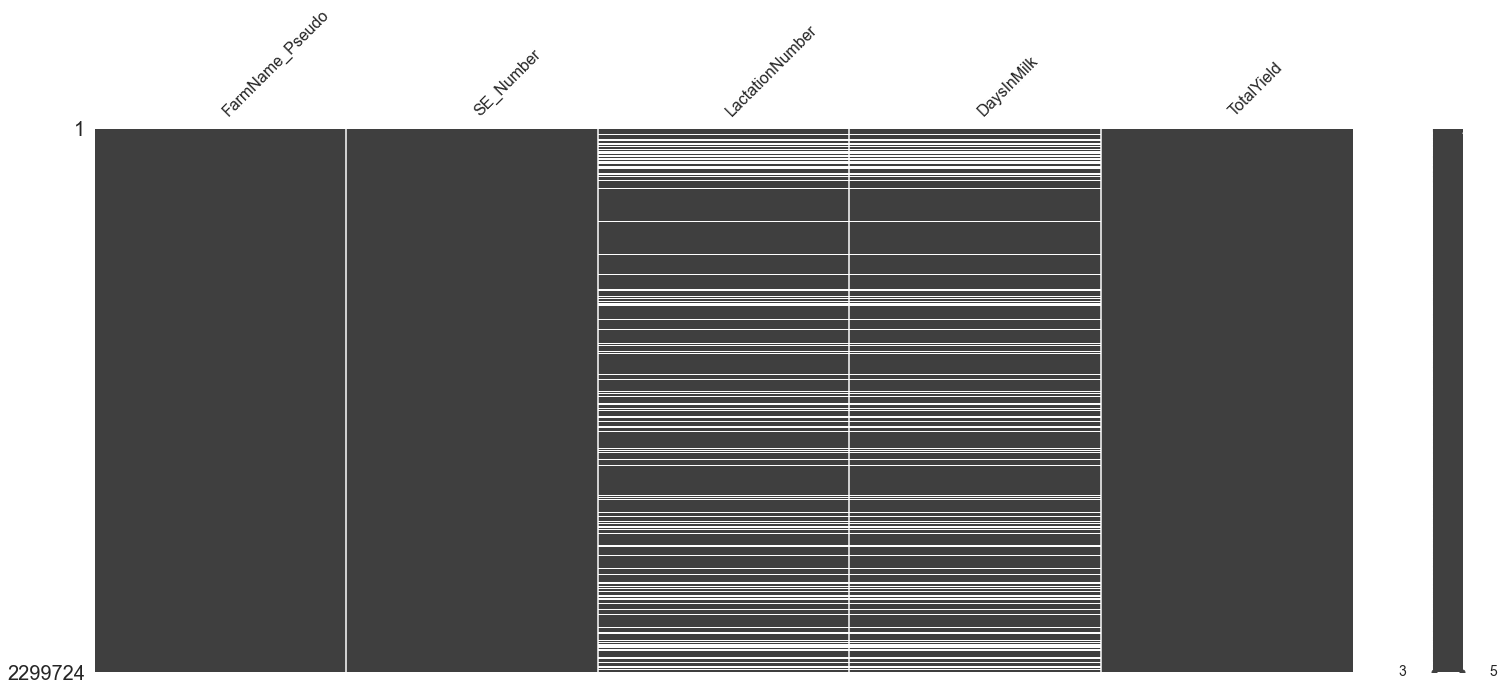

Farm 1 has 243260 events registered between 2019-11-27 and 2022-08-23
There are 174 cows on the farm
94.6% of the events have data for days in milk
94.6% of the events have data for lactation number
The average daily milk yield per cow is 33.59 with a standard deviation of 11.7
The average daily number of milkings per cow is 2.95 with a standard deviation of 0.85


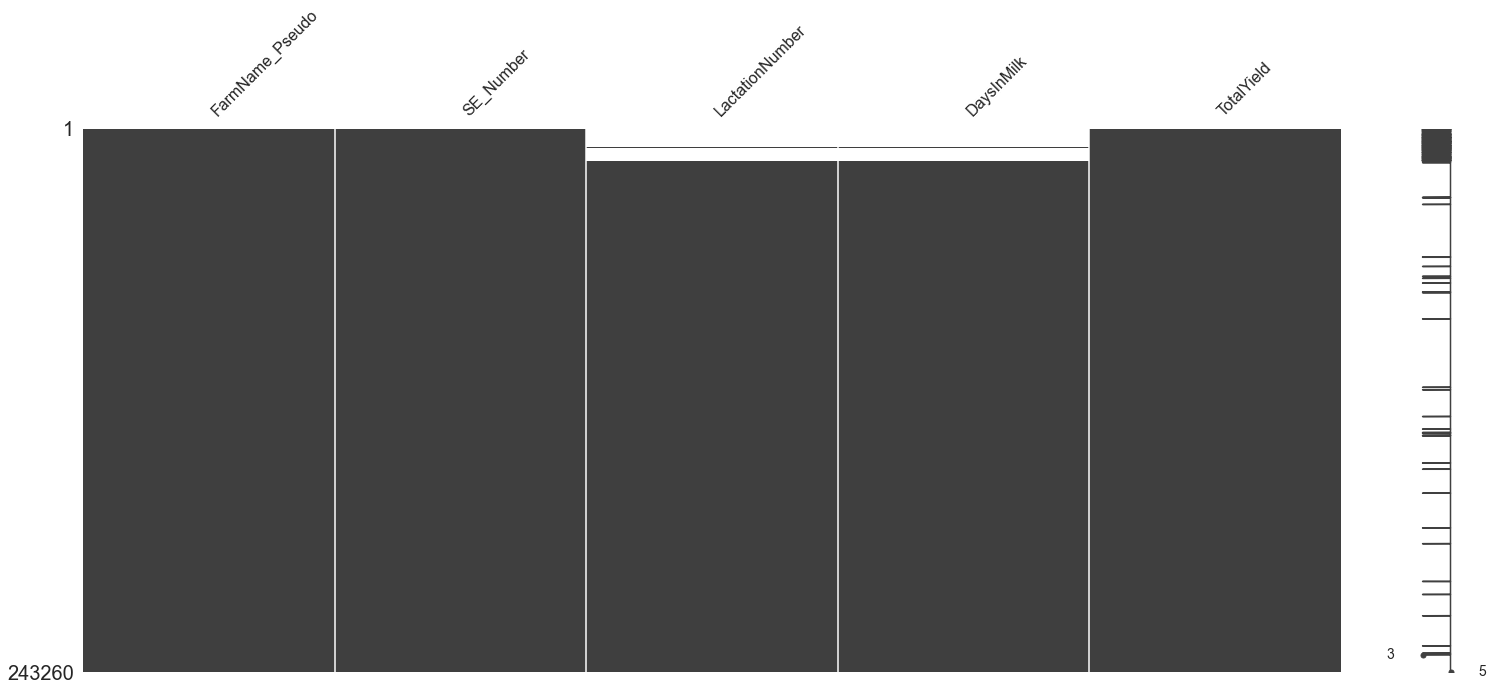

Farm 3 has 244541 events registered between 2020-03-22 and 2022-08-21
There are 225 cows on the farm
68.08% of the events have data for days in milk
68.08% of the events have data for lactation number
The average daily milk yield per cow is 37.4 with a standard deviation of 12.73
The average daily number of milkings per cow is 2.38 with a standard deviation of 0.76


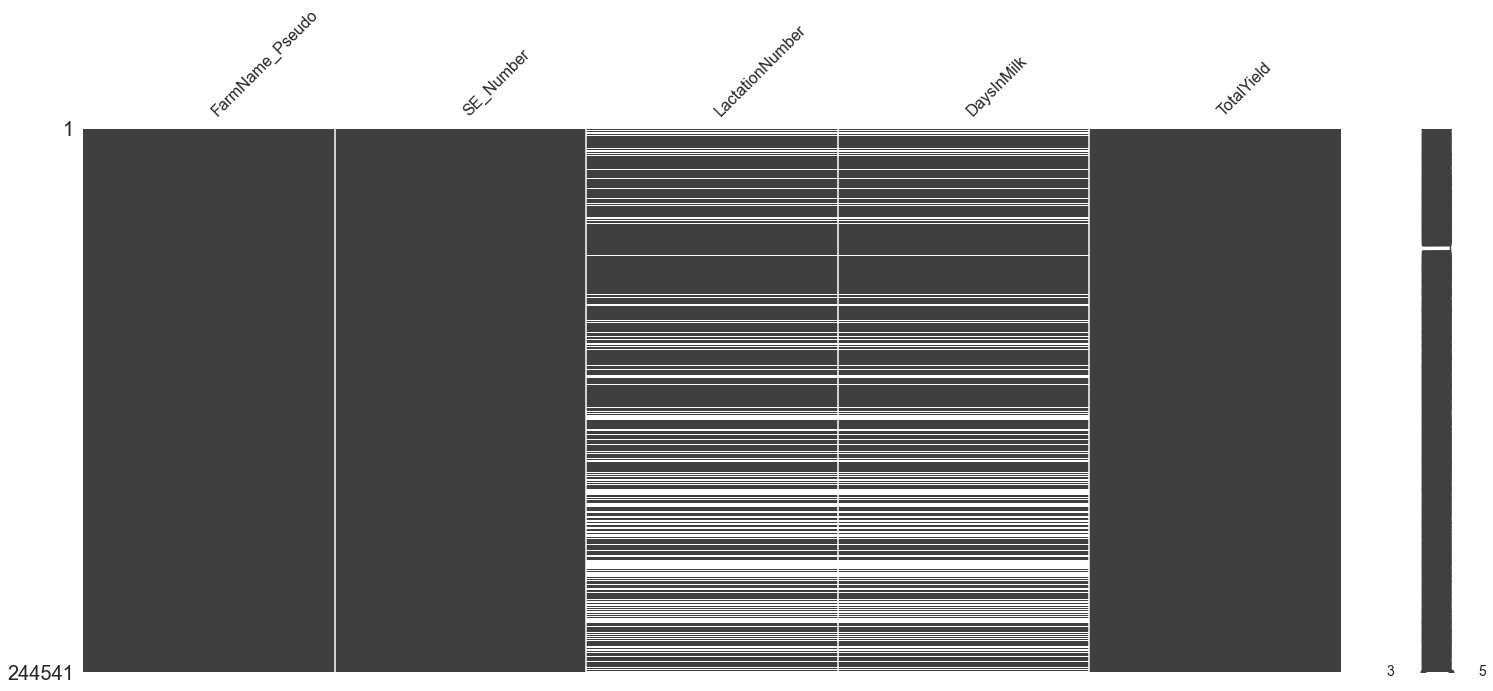

Farm 9 has 240129 events registered between 2020-03-22 and 2022-08-23
There are 232 cows on the farm
84.05% of the events have data for days in milk
84.05% of the events have data for lactation number
The average daily milk yield per cow is 29.05 with a standard deviation of 11.17
The average daily number of milkings per cow is 2.38 with a standard deviation of 0.74


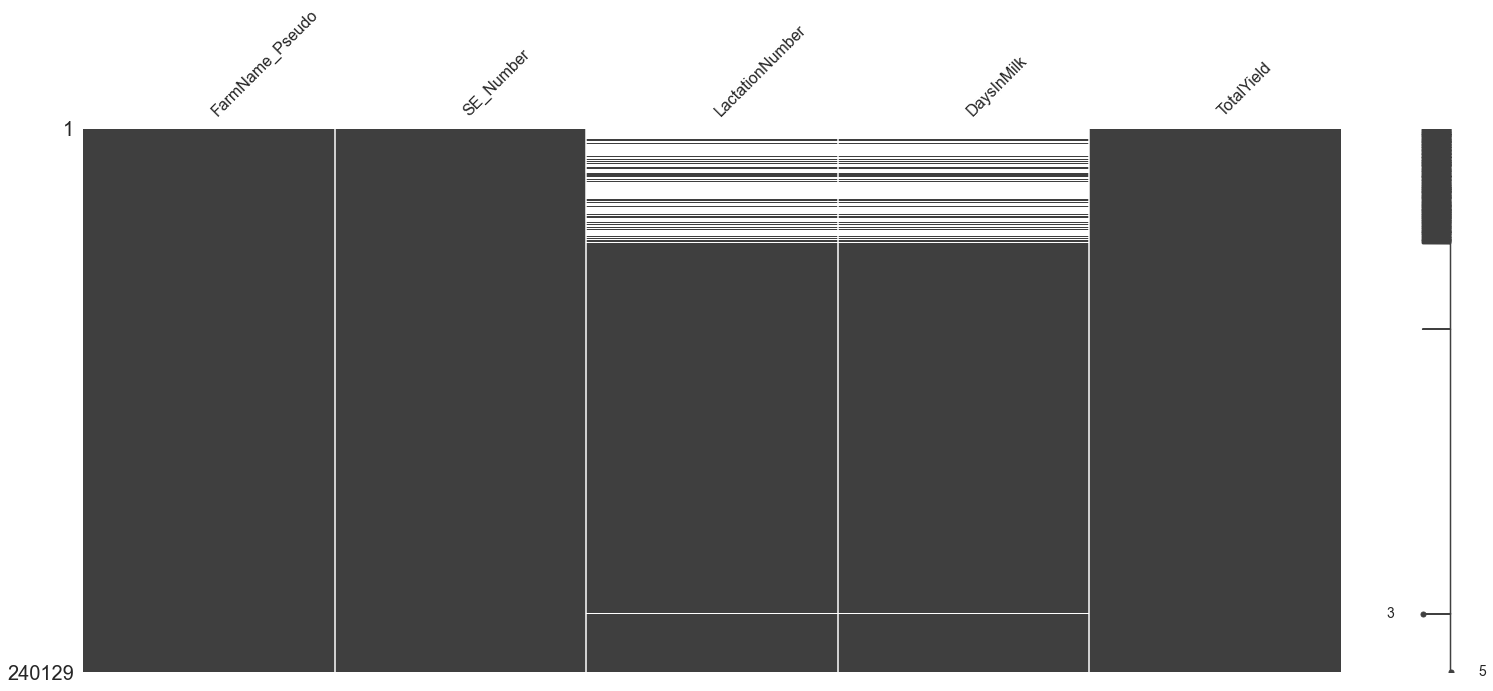

Farm 2 has 225842 events registered between 2020-03-23 and 2022-07-26
There are 200 cows on the farm
81.35% of the events have data for days in milk
81.35% of the events have data for lactation number
The average daily milk yield per cow is 35.67 with a standard deviation of 10.96
The average daily number of milkings per cow is 2.82 with a standard deviation of 0.79


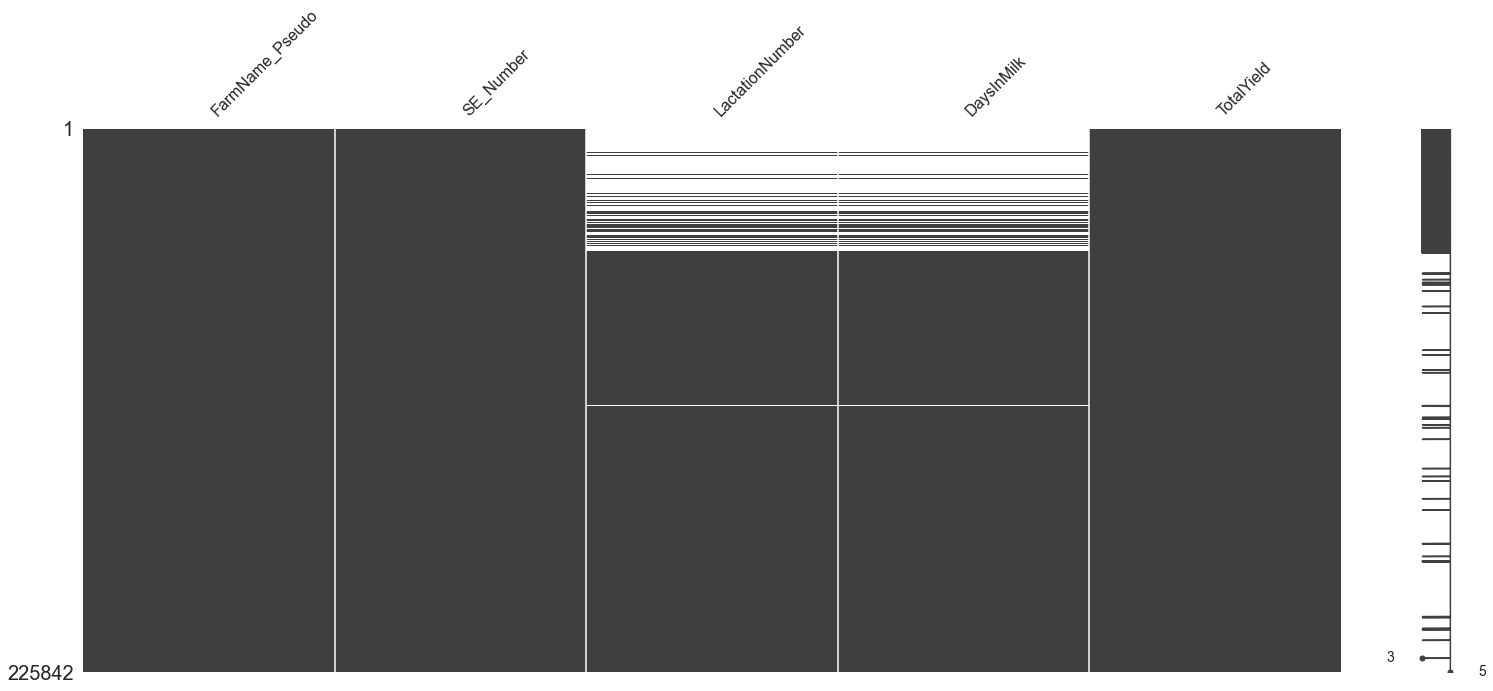

Farm 8 has 392182 events registered between 2020-11-26 and 2022-08-23
There are 414 cows on the farm
99.83% of the events have data for days in milk
99.99% of the events have data for lactation number
The average daily milk yield per cow is 32.28 with a standard deviation of 8.29
The average daily number of milkings per cow is 2.93 with a standard deviation of 0.32


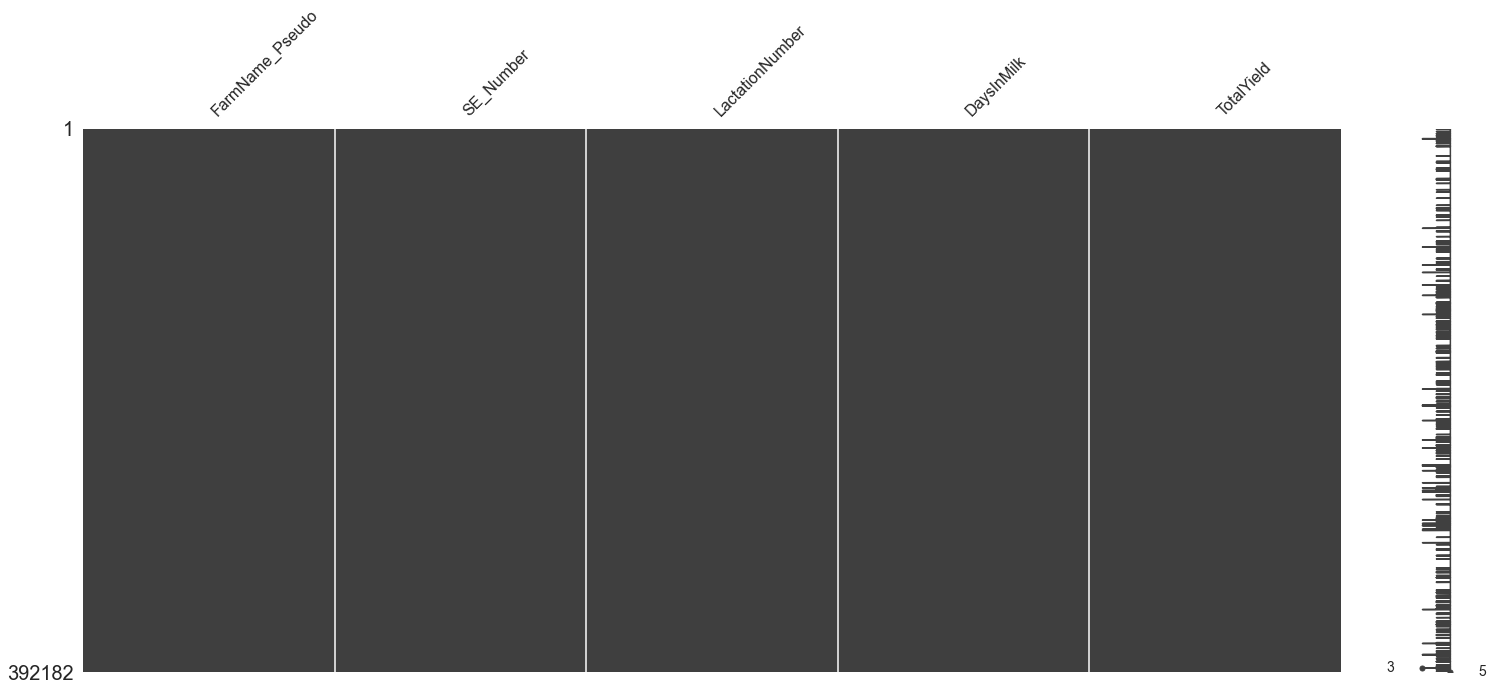

Farm 4 has 124 events registered between 2021-02-24 and 2021-02-24
There are 39 cows on the farm
100.0% of the events have data for days in milk
100.0% of the events have data for lactation number
The average daily milk yield per cow is 27.53 with a standard deviation of 8.2
The average daily number of milkings per cow is 3.18 with a standard deviation of 0.64


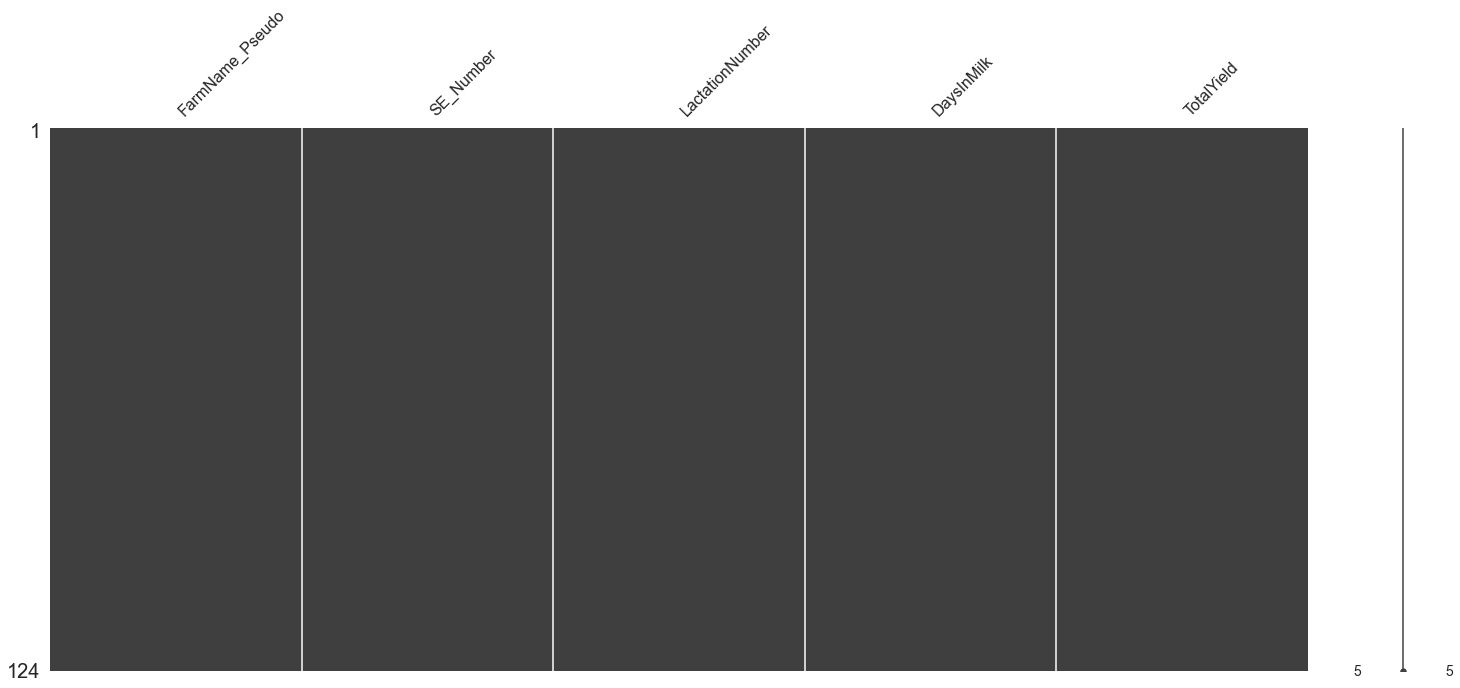

Farm 5 has 318684 events registered between 2021-05-24 and 2022-06-23
There are 376 cows on the farm
99.98% of the events have data for days in milk
100.0% of the events have data for lactation number
The average daily milk yield per cow is 37.14 with a standard deviation of 10.61
The average daily number of milkings per cow is 2.91 with a standard deviation of 0.38


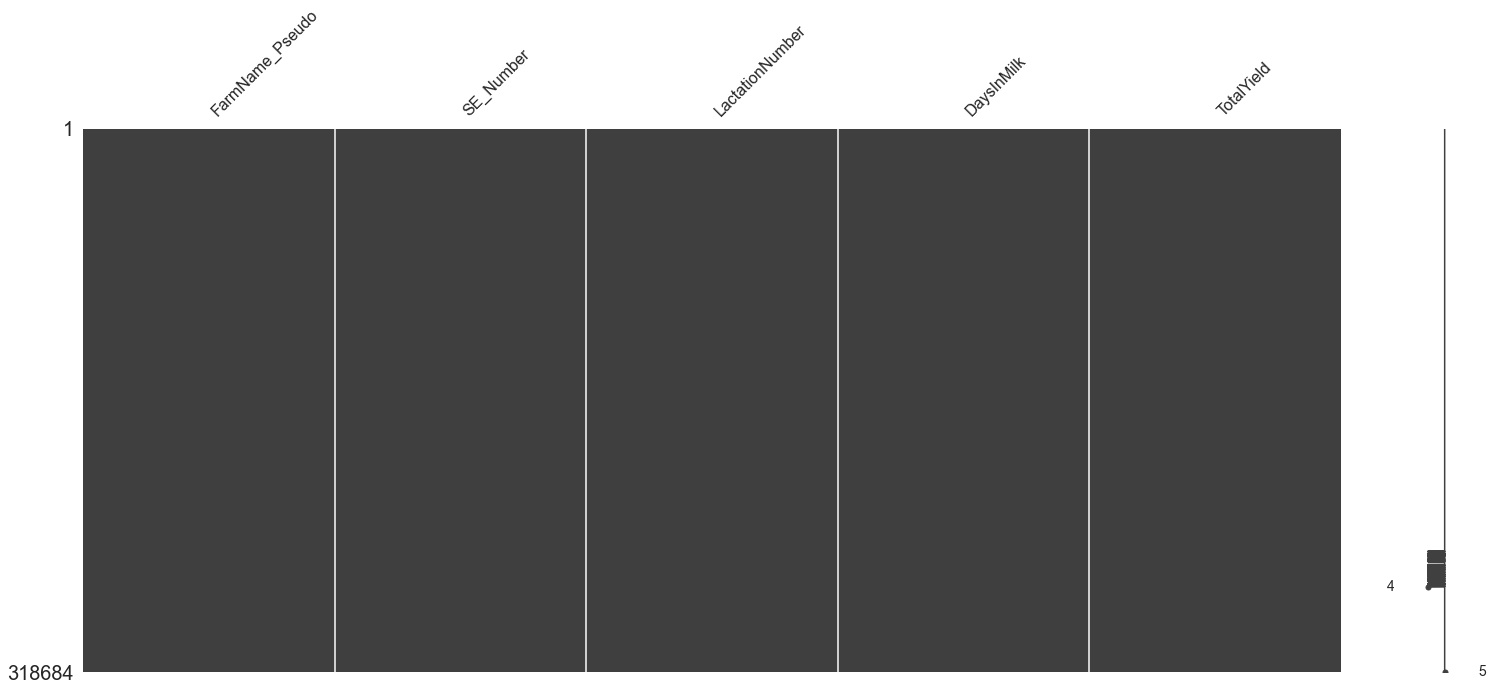

Farm 7 has 632597 events registered between 2021-06-04 and 2022-08-23
There are 409 cows on the farm
46.92% of the events have data for days in milk
46.88% of the events have data for lactation number
The average daily milk yield per cow is 75.37 with a standard deviation of 22.83
The average daily number of milkings per cow is 5.59 with a standard deviation of 1.06


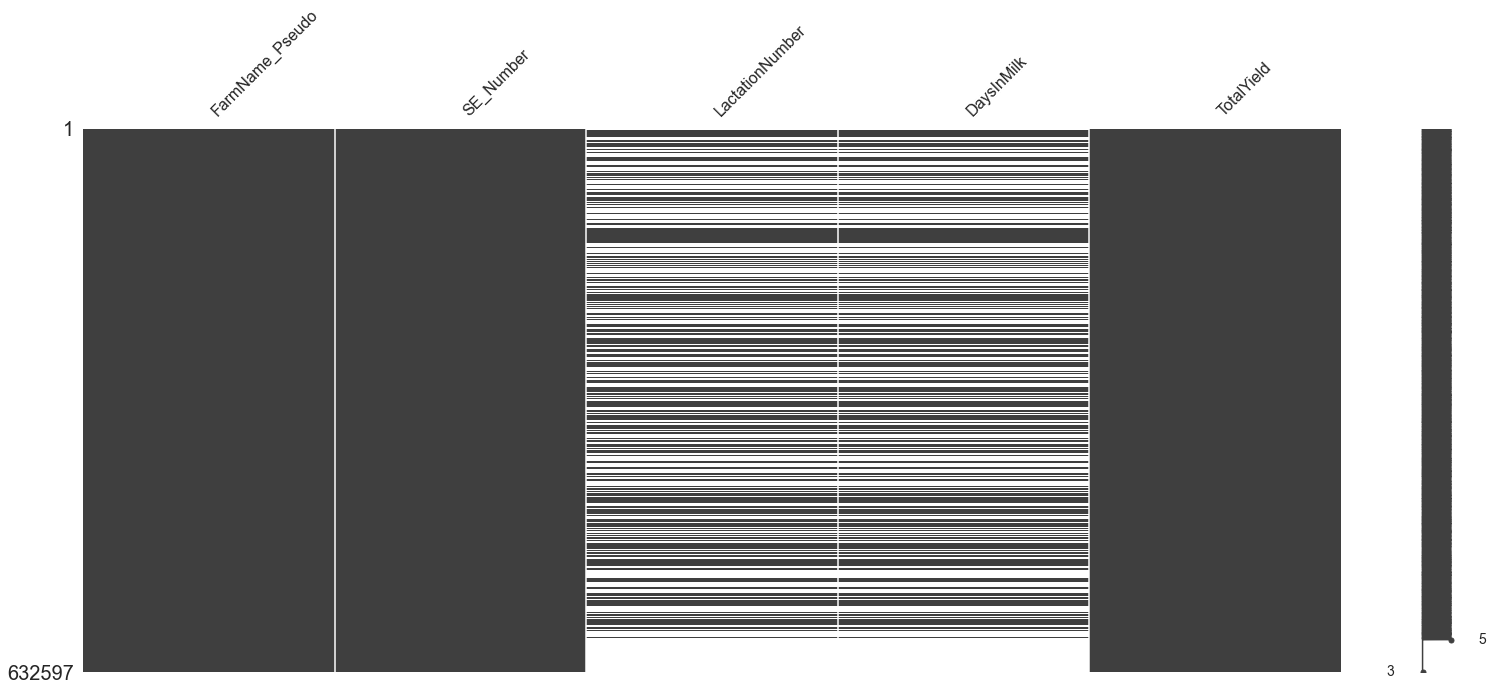

Farm 6 has 2365 events registered between 2021-11-23 and 2022-07-11
There are 143 cows on the farm
100.0% of the events have data for days in milk
100.0% of the events have data for lactation number
The average daily milk yield per cow is 36.9 with a standard deviation of 9.49
The average daily number of milkings per cow is 2.93 with a standard deviation of 0.3


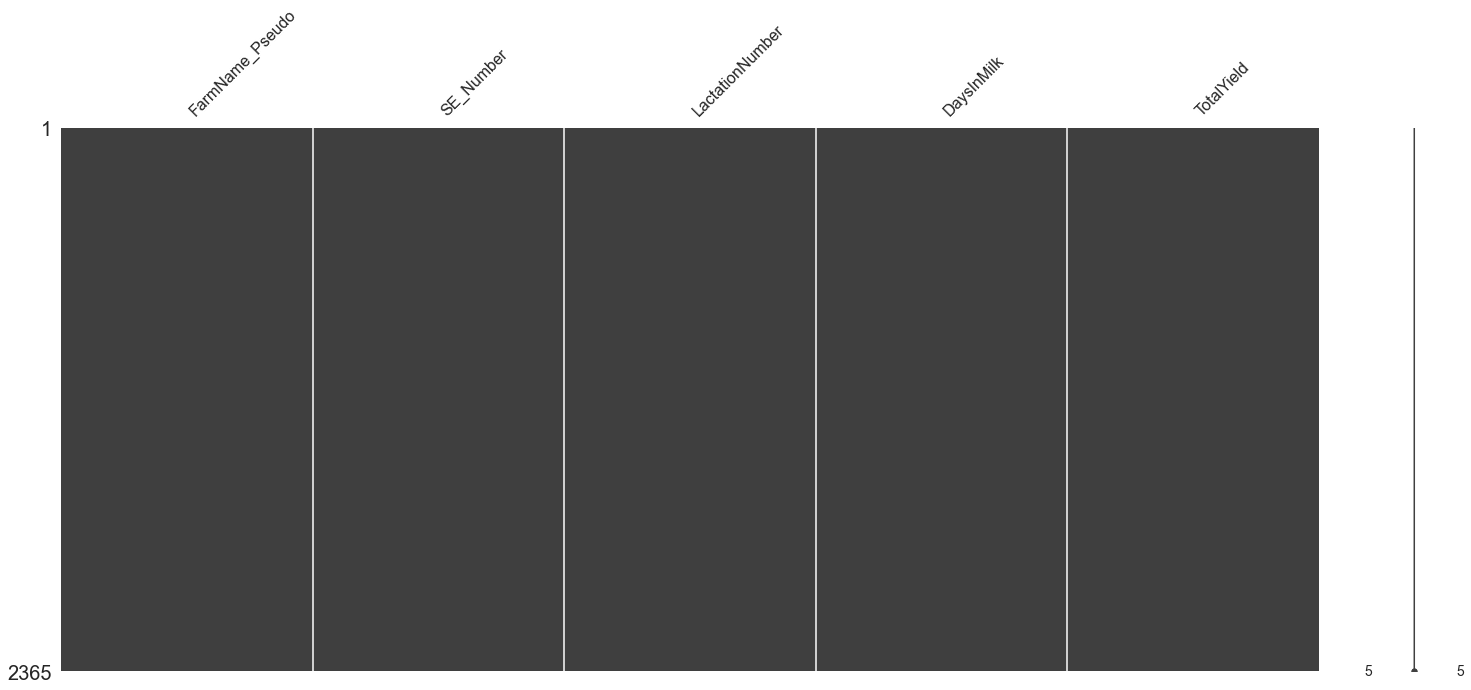

In [126]:
summaryStatistics("Every farm")

farmNames = milk["FarmName_Pseudo"].unique()
for name in farmNames:
    summaryStatistics(name)


Conclusion:

1. Farm 4 and Farm 6 have very few records, and are probably of no use for this analysis.
2. There are in general quite a few events with missing data for LactationNumber and DaysInMilk.
3. The time range of the farms varies from almost three years to less than one year.
4. There is a significant difference in average daily milk yield between the farms.
5. The average number of milkings per cow varies a bit between the farms, but the standard deviation varies a lot, likely because some farms have automated milking systems, while others do not.